Yfinance and TA-Lib Analysis 

In [1]:
import yfinance as yf 
import matplotlib.pyplot as plt 
import plotly.express as px
import pandas as pd 

In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
tickers = pd.read_csv(R'C:\Users\MMM\Documents\10 Academy File\KAIM-Week-12\data\yfinance_data\MSFT_historical_data.csv')

# Display the first few rows of the DataFrame
print(tickers.head())



         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.059946  1031788800   
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.062087   308160000   
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.063158   133171200   
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.061552    67766400   
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.060482    47894400   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [3]:
msft  = yf.Ticker('MSFT')

In [4]:
msft.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 

In [5]:
hist = msft.history(period = "max")
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054594,0.062623,0.054594,0.059946,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.059946,0.063158,0.059946,0.062087,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062087,0.063694,0.062087,0.063158,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063158,0.063694,0.061017,0.061552,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061552,0.062087,0.059947,0.060482,47894400,0.0,0.0


In [6]:
hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-11-14 00:00:00-05:00,425.000000,428.170013,420.000000,426.890015,30246900,0.0,0.0
2024-11-15 00:00:00-05:00,419.820007,422.799988,413.640015,415.000000,28247600,0.0,0.0
2024-11-18 00:00:00-05:00,414.869995,418.399994,412.100006,415.760010,24742000,0.0,0.0
2024-11-19 00:00:00-05:00,413.109985,417.940002,411.549988,417.790009,18133500,0.0,0.0
2024-11-20 00:00:00-05:00,416.869995,417.084991,410.579987,413.480011,8081932,0.0,0.0


In [7]:
hist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,9752.000000,9752.000000,9752.000000,9752.000000,9.752000e+03,9752.000000,9752.000000
mean,55.709879,56.262699,55.133049,55.719881,5.647635e+07,0.003034,0.001743
std,95.570956,96.433412,94.630943,95.575727,3.813452e+07,0.046947,0.057706
min,0.054594,0.056735,0.054594,0.055665,2.304000e+06,0.000000,0.000000
25%,3.582748,3.635736,3.526148,3.587566,3.163762e+07,0.000000,0.000000
50%,19.224434,19.490255,19.046677,19.239758,4.964195e+07,0.000000,0.000000
75%,39.598387,39.947129,39.219718,39.687850,7.038105e+07,0.000000,0.000000
max,466.159796,467.507368,463.624357,466.718781,1.031789e+09,3.080000,2.000000


In [8]:
# Check the column names
hist.columns


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [13]:
hist.dropna(inplace=True)


In [14]:
import talib

# Moving Averages
hist['SMA_20'] = talib.SMA(hist['Close'], timeperiod=20)
hist['EMA_20'] = talib.EMA(hist['Close'], timeperiod=20)

# RSI
hist['RSI_14'] = talib.RSI(hist['Close'], timeperiod=14)

# MACD
hist['MACD'], hist['MACD_signal'], hist['MACD_hist'] = talib.MACD(hist['Close'])


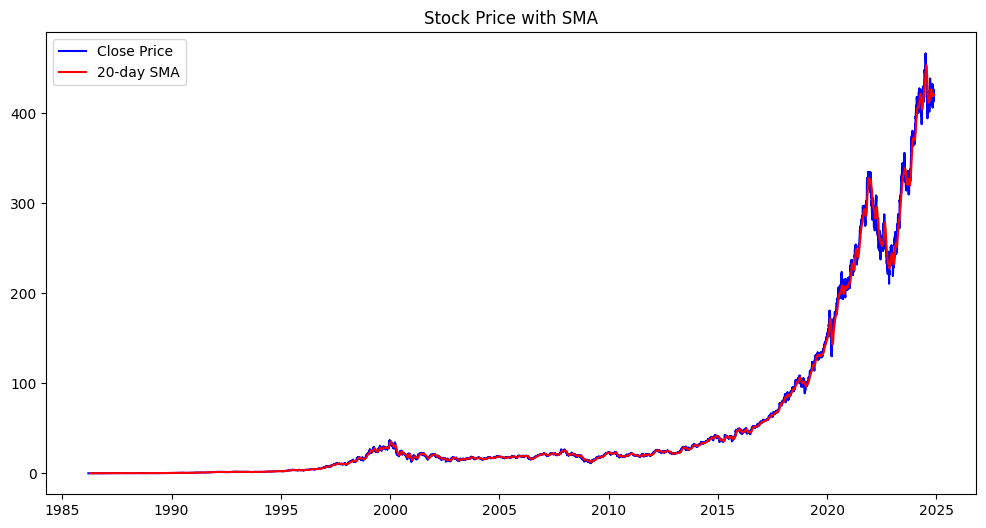

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(hist['Close'], label='Close Price', color='blue')
plt.plot(hist['SMA_20'], label='20-day SMA', color='red')
plt.title("Stock Price with SMA")
plt.legend()
plt.show()
